# EDA

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [56]:

df = pd.read_csv("../data/dataset.csv")


In [57]:
df.shape

(1002, 17)

In [58]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [59]:
print(df.describe())


              year          price   cylinders      mileage       doors
count  1002.000000     979.000000  897.000000   968.000000  995.000000
mean   2023.916168   50202.985700    4.975474    69.033058    3.943719
std       0.298109   18700.392062    1.392526   507.435745    0.274409
min    2023.000000       0.000000    0.000000     0.000000    2.000000
25%    2024.000000   36600.000000    4.000000     4.000000    4.000000
50%    2024.000000   47165.000000    4.000000     8.000000    4.000000
75%    2024.000000   58919.500000    6.000000    13.000000    4.000000
max    2025.000000  195895.000000    8.000000  9711.000000    5.000000


In [60]:
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [61]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64


In [62]:

df.drop_duplicates(inplace=True)

In [63]:
df.shape

(978, 17)

In [64]:
df = df.drop(["description","name","mileage","body","doors","exterior_color","interior_color","engine","cylinders"], axis = 1)

In [65]:
df.head()

,make,model,year,price,fuel,transmission,trim,drivetrain
0,Jeep,Wagoneer,2024,74600.0,Gasoline,8-Speed Automatic,Series II,Four-wheel Drive
1,Jeep,Grand Cherokee,2024,50170.0,Gasoline,8-Speed Automatic,Laredo,Four-wheel Drive
2,GMC,Yukon XL,2024,96410.0,Gasoline,Automatic,Denali,Four-wheel Drive
3,Dodge,Durango,2023,46835.0,Gasoline,8-Speed Automatic,Pursuit,All-wheel Drive
4,RAM,3500,2024,81663.0,Diesel,6-Speed Automatic,Laramie,Four-wheel Drive


In [66]:
df.shape

(978, 8)

In [67]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 make             0
model            0
year             0
price           23
fuel             7
transmission     2
trim             1
drivetrain       0
dtype: int64


In [68]:
df["make"].unique()

array(['Jeep', 'GMC', 'Dodge', 'RAM', 'Nissan', 'Ford', 'Hyundai',
       'Chevrolet', 'Volkswagen', 'Chrysler', 'Kia', 'Mazda', 'Acura',
       'Subaru', 'Audi', 'BMW', 'Toyota', 'Buick', 'Mercedes-Benz',
       'Honda', 'Lincoln', 'Cadillac', 'INFINITI', 'Lexus', 'Land Rover',
       'Volvo', 'Genesis', 'Jaguar'], dtype=object)

In [69]:
df["model"].unique()

array(['Wagoneer', 'Grand Cherokee', 'Yukon XL', 'Durango', '3500',
       'Murano', 'F-350', 'Tucson Hybrid', 'Compass', 'Santa Cruz',
       'Blazer EV', 'Explorer', 'Taos', 'Jetta', 'Hornet', 'Tucson',
       'Terrain', 'Pacifica', '2500', 'Transit-250', 'Grand Cherokee 4xe',
       'EV6', 'Mustang Mach-E', 'Silverado 1500', 'Seltos', 'Blazer',
       'Wrangler', 'CX-90 PHEV', 'MDX', 'Outback', 'Atlas Cross Sport',
       'IONIQ 5', 'Q8 e-tron', 'Sonata Hybrid', 'EV9', 'Sportage Hybrid',
       'Expedition', 'Atlas', 'Grand Cherokee L', 'X7', 'Tundra Hybrid',
       'Kicks', 'Envista', 'Rogue', 'Wagoneer L', 'Sportage', 'EQE 350+',
       'Sonata', 'Ranger', 'SQ5', 'Q5 e', 'Charger', 'Sprinter 2500',
       'CR-V Hybrid', 'IONIQ 6', 'Transit-150', 'Santa Fe', 'Equinox',
       'Solterra', 'Wrangler 4xe', 'ProMaster 2500', 'Corsair',
       'Savana 2500', 'Pacifica Hybrid', 'ZDX', 'Altima', 'EQS 450',
       'ProMaster 3500', 'XT5', 'Gladiator', 'QX50', 'Versa',
       'AMG GLE 53', 

In [70]:
df["year"].unique()

array([2024, 2023, 2025], dtype=int64)

In [71]:
df = df[df['price'].notna()]


In [72]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 make            0
model           0
year            0
price           0
fuel            7
transmission    2
trim            1
drivetrain      0
dtype: int64


In [73]:
df = df[df['fuel'].notna()]


In [74]:

df = df[df['transmission'].notna()]


In [75]:
df = df[df['trim'].notna()]


In [76]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 make            0
model           0
year            0
price           0
fuel            0
transmission    0
trim            0
drivetrain      0
dtype: int64


In [77]:
df.shape

(945, 8)

In [78]:
df["transmission"].unique()

array(['8-Speed Automatic', 'Automatic', '6-Speed Automatic',
       'Automatic CVT', '10-Speed Automatic',
       '8-Speed Automatic with Auto-Shift', '1-Speed Automatic',
       '7-Speed DSG Automatic with Tiptronic',
       '8-Speed Automatic with Tiptronic', '9-Speed Automatic',
       '8-speed automatic', 'CVT', '7-Speed Automatic S tronic',
       '7-Speed DSGA? Automatic w/ 4MO',
       '6-Speed Automatic Electronic with Overdrive',
       '9-Speed 948TE Automatic', '8-Speed A/T', 'Variable',
       '7-Speed Automatic with Auto-Shift', '9-Speed A/T',
       '9 Spd Automatic', 'Aisin 6-Speed Automatic',
       '6-Spd Aisin F21-250 PHEV Auto Trans', '62 kWh battery',
       '10-Speed Shiftable Automatic', '9-speed automatic',
       '6-SPEED AUTOMATIC', 'automatic w/paddle shifters', 'A/T',
       '8-Speed Shiftable Automatic', '6-Speed DCT Automatic',
       '1-Speed CVT with Overdrive', '6-Speed A/T', '(CVT) CONT VAR.',
       'CVT with Xtronic', '8 Speed Dual Clutch',
       '1

In [79]:
def convert_to_speed_automatic(df, column='transmission'):
    def update_transmission(val):
        for x in range(1, 11):  # Check for 1 to 10
            if str(x) in str(val):
                return f"{x}-Speed Automatic"
        return val
    df[column] = df[column].astype(str).apply(update_transmission)
    return df


In [80]:
df = convert_to_speed_automatic(df, column='transmission')


In [81]:
df

,make,model,year,price,fuel,transmission,trim,drivetrain
0,Jeep,Wagoneer,2024,74600.0,Gasoline,8-Speed Automatic,Series II,Four-wheel Drive
1,Jeep,Grand Cherokee,2024,50170.0,Gasoline,8-Speed Automatic,Laredo,Four-wheel Drive
2,GMC,Yukon XL,2024,96410.0,Gasoline,Automatic,Denali,Four-wheel Drive
3,Dodge,Durango,2023,46835.0,Gasoline,8-Speed Automatic,Pursuit,All-wheel Drive
4,RAM,3500,2024,81663.0,Diesel,6-Speed Automatic,Laramie,Four-wheel Drive
...,...,...,...,...,...,...,...,...
996,RAM,2500,2024,69315.0,Diesel,Automatic,Tradesman,Four-wheel Drive
997,Mercedes-Benz,Sprinter 2500,2024,59037.0,Diesel,9-Speed Automatic,Standard Roof,Rear-wheel Drive
999,Jeep,Wagoneer,2024,69085.0,Gasoline,8-Speed Automatic,Base,Four-wheel Drive
1000,Nissan,Murano,2024,43495.0,Gasoline,Automatic,SV Intelligent AWD,All-wheel Drive


In [82]:
df["drivetrain"].unique()

array(['Four-wheel Drive', 'All-wheel Drive', 'Rear-wheel Drive',
       'Front-wheel Drive'], dtype=object)

In [83]:
df.drop(["trim"],axis = 1)

,make,model,year,price,fuel,transmission,drivetrain
0,Jeep,Wagoneer,2024,74600.0,Gasoline,8-Speed Automatic,Four-wheel Drive
1,Jeep,Grand Cherokee,2024,50170.0,Gasoline,8-Speed Automatic,Four-wheel Drive
2,GMC,Yukon XL,2024,96410.0,Gasoline,Automatic,Four-wheel Drive
3,Dodge,Durango,2023,46835.0,Gasoline,8-Speed Automatic,All-wheel Drive
4,RAM,3500,2024,81663.0,Diesel,6-Speed Automatic,Four-wheel Drive
...,...,...,...,...,...,...,...
996,RAM,2500,2024,69315.0,Diesel,Automatic,Four-wheel Drive
997,Mercedes-Benz,Sprinter 2500,2024,59037.0,Diesel,9-Speed Automatic,Rear-wheel Drive
999,Jeep,Wagoneer,2024,69085.0,Gasoline,8-Speed Automatic,Four-wheel Drive
1000,Nissan,Murano,2024,43495.0,Gasoline,Automatic,All-wheel Drive


In [84]:
df["fuel"].value_counts()

fuel
Gasoline                626
Hybrid                  134
Electric                 93
Diesel                   72
PHEV Hybrid Fuel         15
E85 Flex Fuel             4
Diesel (B20 capable)      1
Name: count, dtype: int64

In [85]:

df["model"].value_counts()

model
Hornet             59
3500               50
Compass            45
Durango            36
Tucson Hybrid      33
                   ..
Electrified G80     1
Defender            1
SQ8 e-tron          1
Sorento Hybrid      1
Forte               1
Name: count, Length: 147, dtype: int64

In [86]:
brand_models_dict = df.groupby('make')['model'].unique().to_dict()


In [87]:
brand_models_dict

{'Acura': array(['MDX', 'ZDX'], dtype=object),
 'Audi': array(['Q8 e-tron', 'SQ5', 'Q5 e', 'A5 Sportback', 'RS e-tron GT',
        'SQ8 e-tron', 'A3'], dtype=object),
 'BMW': array(['X7', 'i4 Gran Coupe', 'i5', 'i7', 'M235 Gran Coupe', '740', 'X3'],
       dtype=object),
 'Buick': array(['Envista', 'Encore GX', 'Envision', 'Enclave'], dtype=object),
 'Cadillac': array(['XT5', 'LYRIQ', 'XT6'], dtype=object),
 'Chevrolet': array(['Blazer EV', 'Silverado 1500', 'Blazer', 'Equinox', 'Trailblazer',
        'Silverado 2500', 'Trax'], dtype=object),
 'Chrysler': array(['Pacifica', 'Pacifica Hybrid', 'Voyager', '300'], dtype=object),
 'Dodge': array(['Durango', 'Hornet', 'Charger'], dtype=object),
 'Ford': array(['F-350', 'Explorer', 'Transit-250', 'Mustang Mach-E', 'Expedition',
        'Ranger', 'Transit-150', 'Escape', 'Bronco Sport', 'Edge',
        'Bronco', 'F-150', 'Transit Connect', 'Maverick', 'Transit-350'],
       dtype=object),
 'GMC': array(['Yukon XL', 'Terrain', 'Savana 2500', '

# Feature Engineering

In [88]:
df.head(20)

,make,model,year,price,fuel,transmission,trim,drivetrain
0,Jeep,Wagoneer,2024,74600.0,Gasoline,8-Speed Automatic,Series II,Four-wheel Drive
1,Jeep,Grand Cherokee,2024,50170.0,Gasoline,8-Speed Automatic,Laredo,Four-wheel Drive
2,GMC,Yukon XL,2024,96410.0,Gasoline,Automatic,Denali,Four-wheel Drive
3,Dodge,Durango,2023,46835.0,Gasoline,8-Speed Automatic,Pursuit,All-wheel Drive
4,RAM,3500,2024,81663.0,Diesel,6-Speed Automatic,Laramie,Four-wheel Drive
5,Nissan,Murano,2024,46000.0,Gasoline,Automatic CVT,Platinum,All-wheel Drive
6,Jeep,Wagoneer,2024,63862.0,Gasoline,8-Speed Automatic,Base,Rear-wheel Drive
7,Ford,F-350,2024,89978.0,Diesel,1-Speed Automatic,Lariat Super Duty,Four-wheel Drive
8,Hyundai,Tucson Hybrid,2024,42230.0,Hybrid,6-Speed Automatic,Limited,All-wheel Drive
9,Jeep,Grand Cherokee,2024,42773.0,Gasoline,Automatic,Altitude,Four-wheel Drive


<Axes: xlabel='year', ylabel='Count'>

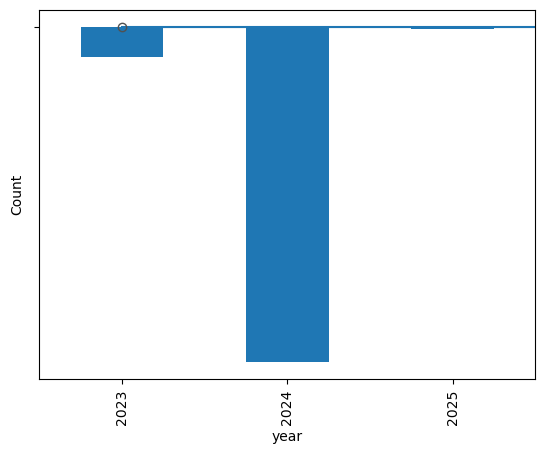

In [89]:
sns.histplot(df['price'], kde=True)
sns.boxplot(x=df['price'])
df['year'].value_counts().sort_index().plot(kind='bar')


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:379: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(-.5, n - .5, auto=None)


<Axes: xlabel='transmission', ylabel='count'>

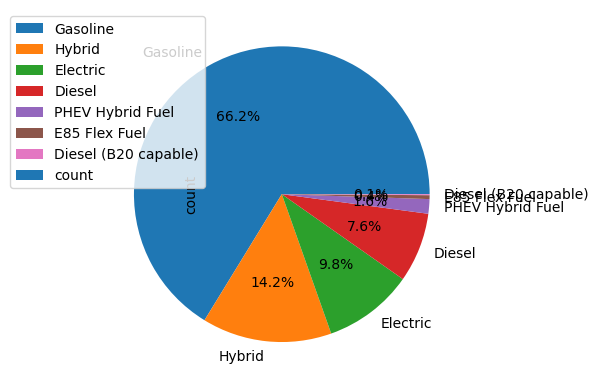

In [90]:
df['make'].value_counts().plot(kind='barh')
df['fuel'].value_counts().plot.pie(autopct='%1.1f%%')
sns.countplot(x='transmission', data=df)


<Axes: xlabel='year', ylabel='price'>

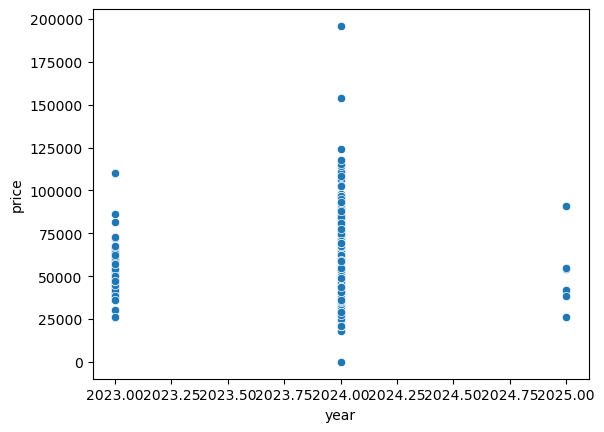

In [91]:
sns.scatterplot(x='year', y='price', data=df)


<Axes: xlabel='fuel', ylabel='price'>

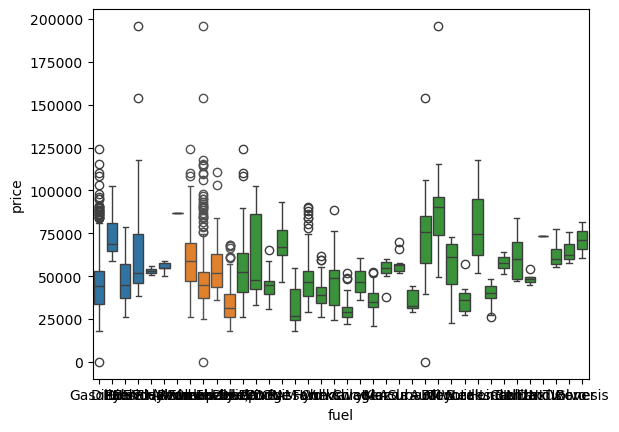

In [92]:
sns.boxplot(x='fuel', y='price', data=df)
sns.boxplot(x='drivetrain', y='price', data=df)
sns.boxplot(x='make', y='price', data=df)


# Feature Engineering


In [93]:
df.head(20)

,make,model,year,price,fuel,transmission,trim,drivetrain
0,Jeep,Wagoneer,2024,74600.0,Gasoline,8-Speed Automatic,Series II,Four-wheel Drive
1,Jeep,Grand Cherokee,2024,50170.0,Gasoline,8-Speed Automatic,Laredo,Four-wheel Drive
2,GMC,Yukon XL,2024,96410.0,Gasoline,Automatic,Denali,Four-wheel Drive
3,Dodge,Durango,2023,46835.0,Gasoline,8-Speed Automatic,Pursuit,All-wheel Drive
4,RAM,3500,2024,81663.0,Diesel,6-Speed Automatic,Laramie,Four-wheel Drive
5,Nissan,Murano,2024,46000.0,Gasoline,Automatic CVT,Platinum,All-wheel Drive
6,Jeep,Wagoneer,2024,63862.0,Gasoline,8-Speed Automatic,Base,Rear-wheel Drive
7,Ford,F-350,2024,89978.0,Diesel,1-Speed Automatic,Lariat Super Duty,Four-wheel Drive
8,Hyundai,Tucson Hybrid,2024,42230.0,Hybrid,6-Speed Automatic,Limited,All-wheel Drive
9,Jeep,Grand Cherokee,2024,42773.0,Gasoline,Automatic,Altitude,Four-wheel Drive


In [94]:
df['car_age'] = 2025 - df['year']  


In [95]:
df.head()

,make,model,year,price,fuel,transmission,trim,drivetrain,car_age
0,Jeep,Wagoneer,2024,74600.0,Gasoline,8-Speed Automatic,Series II,Four-wheel Drive,1
1,Jeep,Grand Cherokee,2024,50170.0,Gasoline,8-Speed Automatic,Laredo,Four-wheel Drive,1
2,GMC,Yukon XL,2024,96410.0,Gasoline,Automatic,Denali,Four-wheel Drive,1
3,Dodge,Durango,2023,46835.0,Gasoline,8-Speed Automatic,Pursuit,All-wheel Drive,2
4,RAM,3500,2024,81663.0,Diesel,6-Speed Automatic,Laramie,Four-wheel Drive,1


In [98]:
df_cleaned = df.drop(["year"], axis = 1)

In [99]:
df_cleaned.to_csv("../data/cleaned_vehicle_data.csv", index=False)